### Imprting the modules 

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### EDA 

In [172]:
# Reading the dataset
BS_day = pd.read_csv("day.csv")

In [173]:
# Let's take a look at the first few rows
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [174]:
BS_day.shape

(730, 16)

In [175]:
# Understanding the feature names in the dataset
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [176]:
# Getting insights of the features
BS_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [177]:
print(BS_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


### 1. Data Preparation
##### We are analysis the data according to the data dictionary and maupulating the data arrording to the need 

In [178]:
## Variables like 'weathersit' , 'season' , 'mnth' and 'weekday' are some coloums that are categorical coloumns.
## Hence the values are needed to be converted into categorical values and then proceed with the analysis 
 

In [179]:
# Replacing long weathersit names into string values for better readability and understanding

# '1' for 'Clear, Few clouds, Partly cloudy, Partly cloudy'
BS_day.loc[(BS_day['weathersit'] == 1) , 'weathersit'] = 'A'

# '2' for 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
BS_day.loc[(BS_day['weathersit'] == 2) , 'weathersit'] = 'B'

# '3' for 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
BS_day.loc[(BS_day['weathersit'] == 3) , 'weathersit'] = 'C'

# '4' for 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
BS_day.loc[(BS_day['weathersit'] == 4) , 'weathersit'] = 'D'

In [180]:
BS_day['weathersit'].unique() # getting the unique values of the coloumn weathersit

array(['B', 'A', 'C'], dtype=object)

In [181]:
BS_day['weathersit'].astype('category').value_counts() # Taking count based on different weather

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [182]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [183]:
# Assigning string values to different seasons instead of numeric values. 
# These numeric values can be considered as numerical variable but it is not a numerical variable coloumn
# '1' for 'spring'
BS_day.loc[(BS_day['season'] == 1) , 'season'] = 'spring'

# '2' for 'summer'
BS_day.loc[(BS_day['season'] == 2) , 'season'] = 'summer'

# '3' for 'fall'
BS_day.loc[(BS_day['season'] == 3) , 'season'] = 'fall'

# '4' for 'winter'
BS_day.loc[(BS_day['season'] == 4) , 'season'] = 'winter'

In [184]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [185]:
# Checking whether the conversion is done properly or not and getting ther total data count on the basis of season
BS_day['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [186]:
# Assigning string values to different months instead of numeric values.
# Creating map for the different numerical values with respect to integer values of the data
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the 'mnth' column
BS_day[['mnth']] = BS_day[['mnth']].apply(object_map)

In [187]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
BS_day['mnth'].value_counts()

Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [188]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [189]:
BS_day['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [190]:
# Assigning string values to weekdays instead of numeric values.
# A function has been created to map the actual integer value to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
BS_day[['weekday']] = BS_day[['weekday']].apply(str_map)

In [191]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [192]:
BS_day['weekday'].value_counts()

Mon      105
Tues     105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: weekday, dtype: int64

In [193]:
# This 'yr' coloum is having two values (0: 2018, 1:2019) which can be used as the categorical nominal variable hence the 
# it is the best practice use it for our ananlysis. 
BS_day['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [194]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. Data Visualisation

##### Undersnading the data using the graphs and get some insights of the various variable.
##### We'll visualise our data using matplotlib and seaborn.

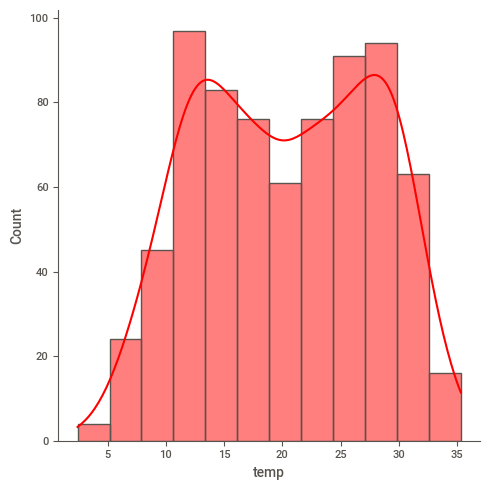

In [195]:
# temperature
sns.displot(BS_day['temp'],color="red", label="Temperature", kde=True)
plt.show()

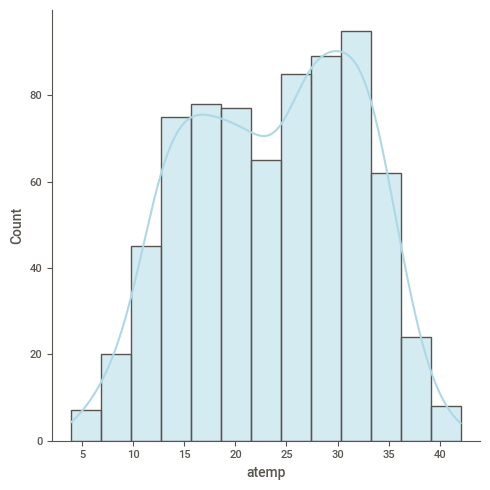

In [196]:
# feeling temperature
sns.displot(BS_day['atemp'],color="lightblue", label="FeelingTemperature",kde=True)
plt.show()

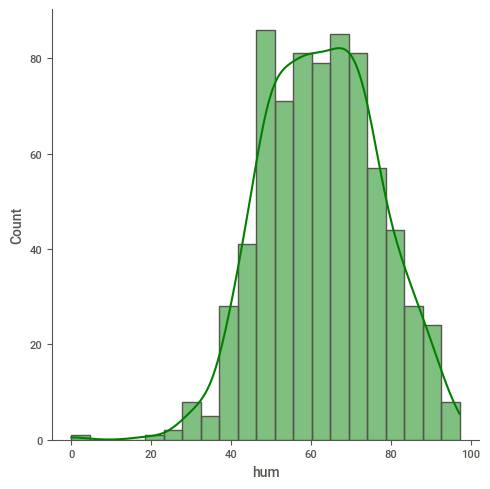

In [197]:
# humidity
sns.displot(BS_day['hum'],color="green", label="FeelingTemperature",kde=True)
plt.show()

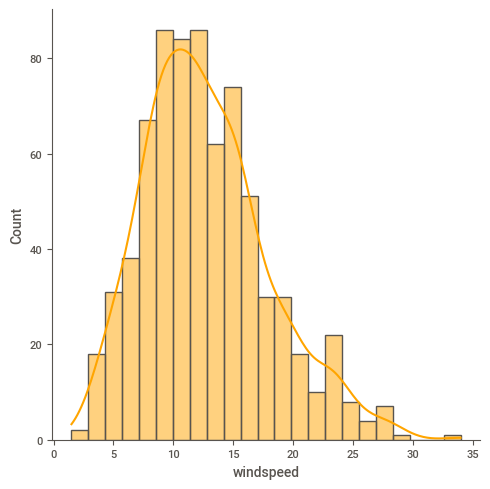

In [198]:
# wind speed
sns.displot(BS_day['windspeed'],color="orange", label="FeelingTemperature",kde=True)
plt.show()

In [199]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [201]:
# Converting date to datetime format
BS_day['dteday']=BS_day['dteday'].astype('datetime64')

In [202]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tues,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Crearting categorical variable dataframe for visualization 

In [203]:
# All categorical variables in a new dataset
BS_day_categorical=BS_day.select_dtypes(exclude=['float64','datetime64','int64'])
print(BS_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [204]:
BS_day_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A


In [205]:
BS_day_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


#### Visualizaton of Categorical variable 

###### 1.according to 'season' the count in spring  and winter is low compared to summer and fall
###### 2. according to 'holiday' the count in holiday(0) is higher and  on non holiday is low
###### 3.according to 'workingday' the count is almost the same for both the cases.
###### 4.according to 'weathersit' the count in 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' is higher
###### 5.according to 'mnth' the count in the mid of the year is higher than the staring and in the end.
###### 6.according to 'weekday' the count is almost same throughout the week.
###### 7.according to 'yr' the count have substantially  increased from previous year 


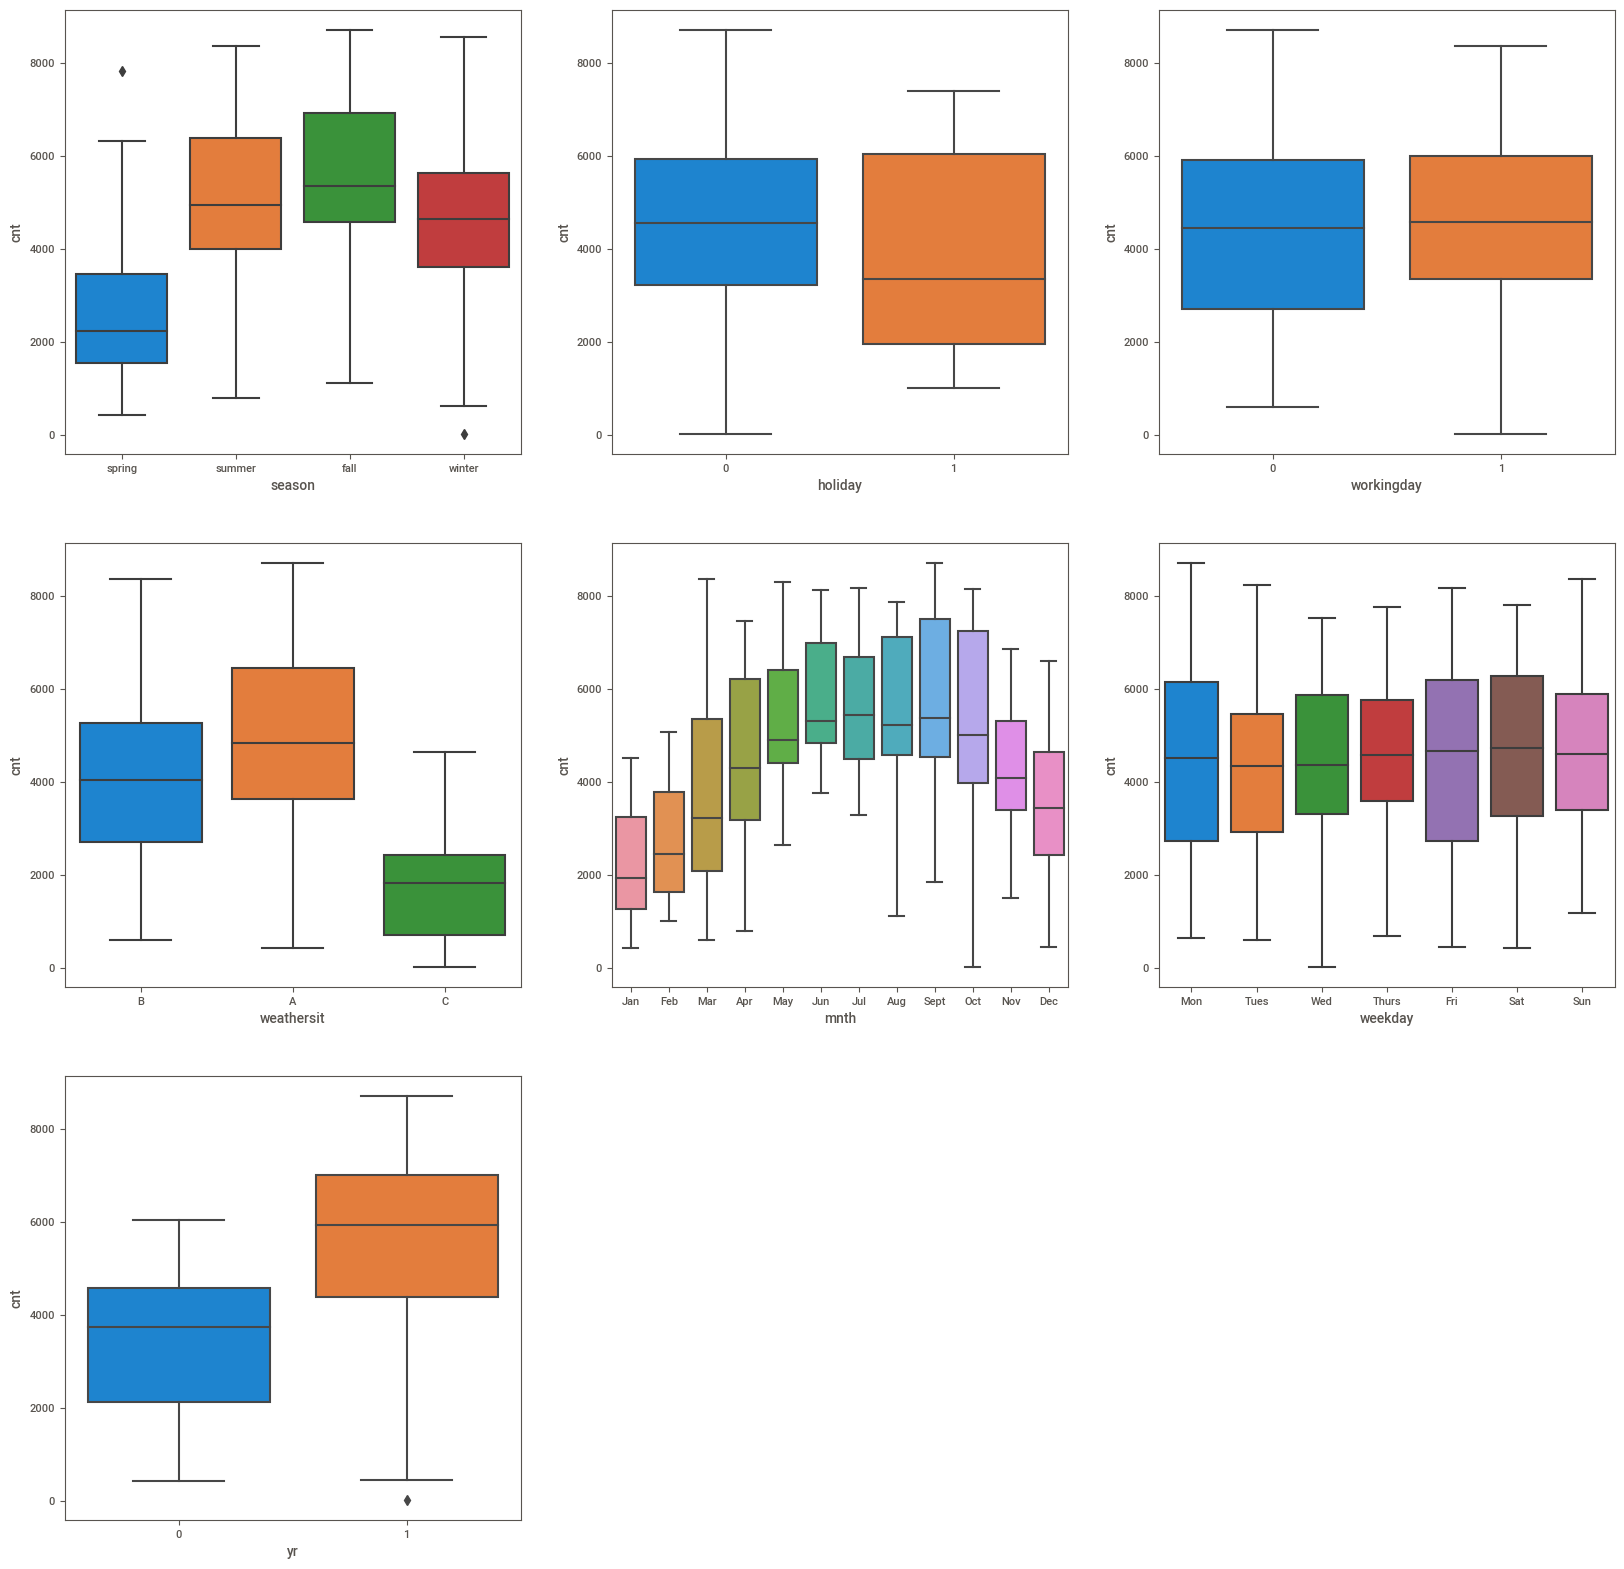

In [206]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_day)
plt.show()

#### Visualizaton of Numerical variable 

In [207]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    BS_day[var] = BS_day[var].astype("float")

In [208]:
# All numeric variables in the dataset
BS_day_numeric = BS_day.select_dtypes(include=['float64'])
BS_day_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [209]:
# Correlation matrix of numerical variable 
cor = BS_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

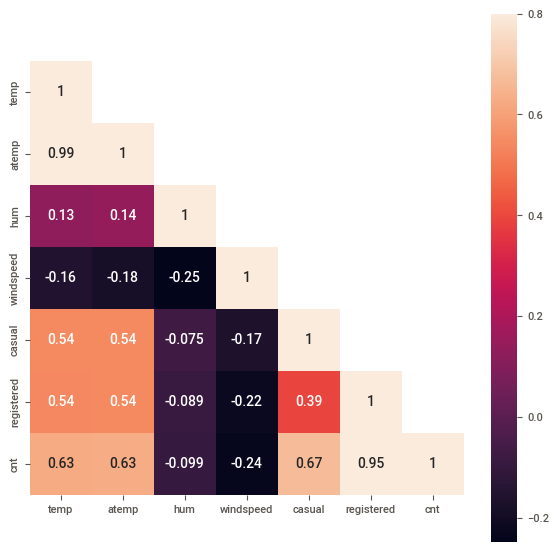

In [210]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(7,7)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:

Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:

Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.
Thus, while building the model, we'll have to pay attention to multicollinearity.

In [211]:
#removing atemp as it is highly correlated with temp
BS_day.drop('atemp',axis=1,inplace=True)    

In [212]:
BS_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    float64       
 13  registered  730 non-null    float64       
 14  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 85.7+ 

### 3. Data Prepration
#### In this data preptation we will create some dummy variable for the building the models 

##### First we will create dummy variables for the data type 'objects' i.e. categorical variable 

In [213]:
# Subset all categorical variables
BS_day_categorical=BS_day.select_dtypes(include=['object'])

In [214]:
BS_day_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A


In [215]:
# Convert into dummies
BS_day_dummies = pd.get_dummies(BS_day_categorical)
BS_day_dummies.head()

,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_A,weathersit_B,weathersit_C
0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [216]:
# Drop categorical variable columns
BS_day = BS_day.drop(list(BS_day_categorical.columns), axis=1)

In [217]:
# Concatenate dummy variables with the original dataframe
BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)

In [218]:
BS_day.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_A,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,1,0,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,1,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,1,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,1,0,0,1,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,1,0,0,0,0,0,0,1,0,0


In [219]:
BS_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        730 non-null    int64         
 1   dteday         730 non-null    datetime64[ns]
 2   yr             730 non-null    int64         
 3   holiday        730 non-null    int64         
 4   workingday     730 non-null    int64         
 5   temp           730 non-null    float64       
 6   hum            730 non-null    float64       
 7   windspeed      730 non-null    float64       
 8   casual         730 non-null    float64       
 9   registered     730 non-null    float64       
 10  cnt            730 non-null    float64       
 11  season_fall    730 non-null    uint8         
 12  season_spring  730 non-null    uint8         
 13  season_summer  730 non-null    uint8         
 14  season_winter  730 non-null    uint8         
 15  mnth_Apr       730 non-

In [220]:
BS_day.describe()

,instant,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_A,weathersit_B,weathersit_C
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,849.249315,3658.757534,4508.006849,...,0.141096,0.143836,0.142466,0.142466,0.142466,0.143836,0.143836,0.634247,0.336986,0.028767
std,210.877136,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,686.479875,1559.758728,1936.011647,...,0.348359,0.351164,0.349767,0.349767,0.349767,0.351164,0.351164,0.481971,0.473004,0.167266
min,1.000000,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,2.000000,20.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,316.250000,2502.250000,3169.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,717.000000,3664.500000,4548.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,1096.500000,4783.250000,5966.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,3410.000000,6946.000000,8714.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [221]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day=BS_day.drop(['instant','dteday'], axis = 1, inplace = False)
BS_day.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_fall,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_A,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,0,...,1,0,0,0,0,0,0,1,0,0


### 4.Model Building 

In [222]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BS_day, train_size=0.7, test_size=0.3, random_state=100)

In [223]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_fall,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_A,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,0,0,0,0,1,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,1,...,0,0,0,0,1,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,0,...,0,1,0,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,0,...,0,0,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,1,0,0,0,0,0,0,1,0


In [224]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_fall,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_A,weathersit_B,weathersit_C
184,0,1,0,29.793347,63.7917,5.459106,3065.0,2978.0,6043.0,1,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,872.0,5339.0,6211.0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,240.0,2419.0,2659.0,0,...,0,0,1,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,884.0,3896.0,4780.0,1,...,1,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,736.0,4232.0,4968.0,0,...,0,0,1,0,0,0,0,1,0,0


In [225]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_fall,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_A,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,837.543137,3648.839216,4486.382353,0.262745,...,0.158824,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,675.921998,1580.336986,1952.158739,0.440557,...,0.365870,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,2.000000,20.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,311.000000,2468.250000,3120.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,700.000000,3657.000000,4530.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,1076.250000,4841.000000,5973.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,3283.000000,6946.000000,8714.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_fall,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_A,weathersit_B,weathersit_C
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,61.961883,12.600130,875.968037,3671.013699,4546.981735,0.246575,...,0.100457,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.652968,0.319635,0.027397
std,0.500722,0.188034,0.459904,7.689600,14.456669,4.984858,712.783588,1509.322560,1898.633630,0.432005,...,0.301297,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.000000,3.957390,25.416700,1.500244,9.000000,432.000000,441.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,51.166700,9.021282,336.500000,2507.500000,3303.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,60.916700,12.167200,736.000000,3667.000000,4579.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,72.192050,15.395629,1190.000000,4624.000000,5869.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,97.250000,27.999836,3410.000000,6844.000000,8395.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


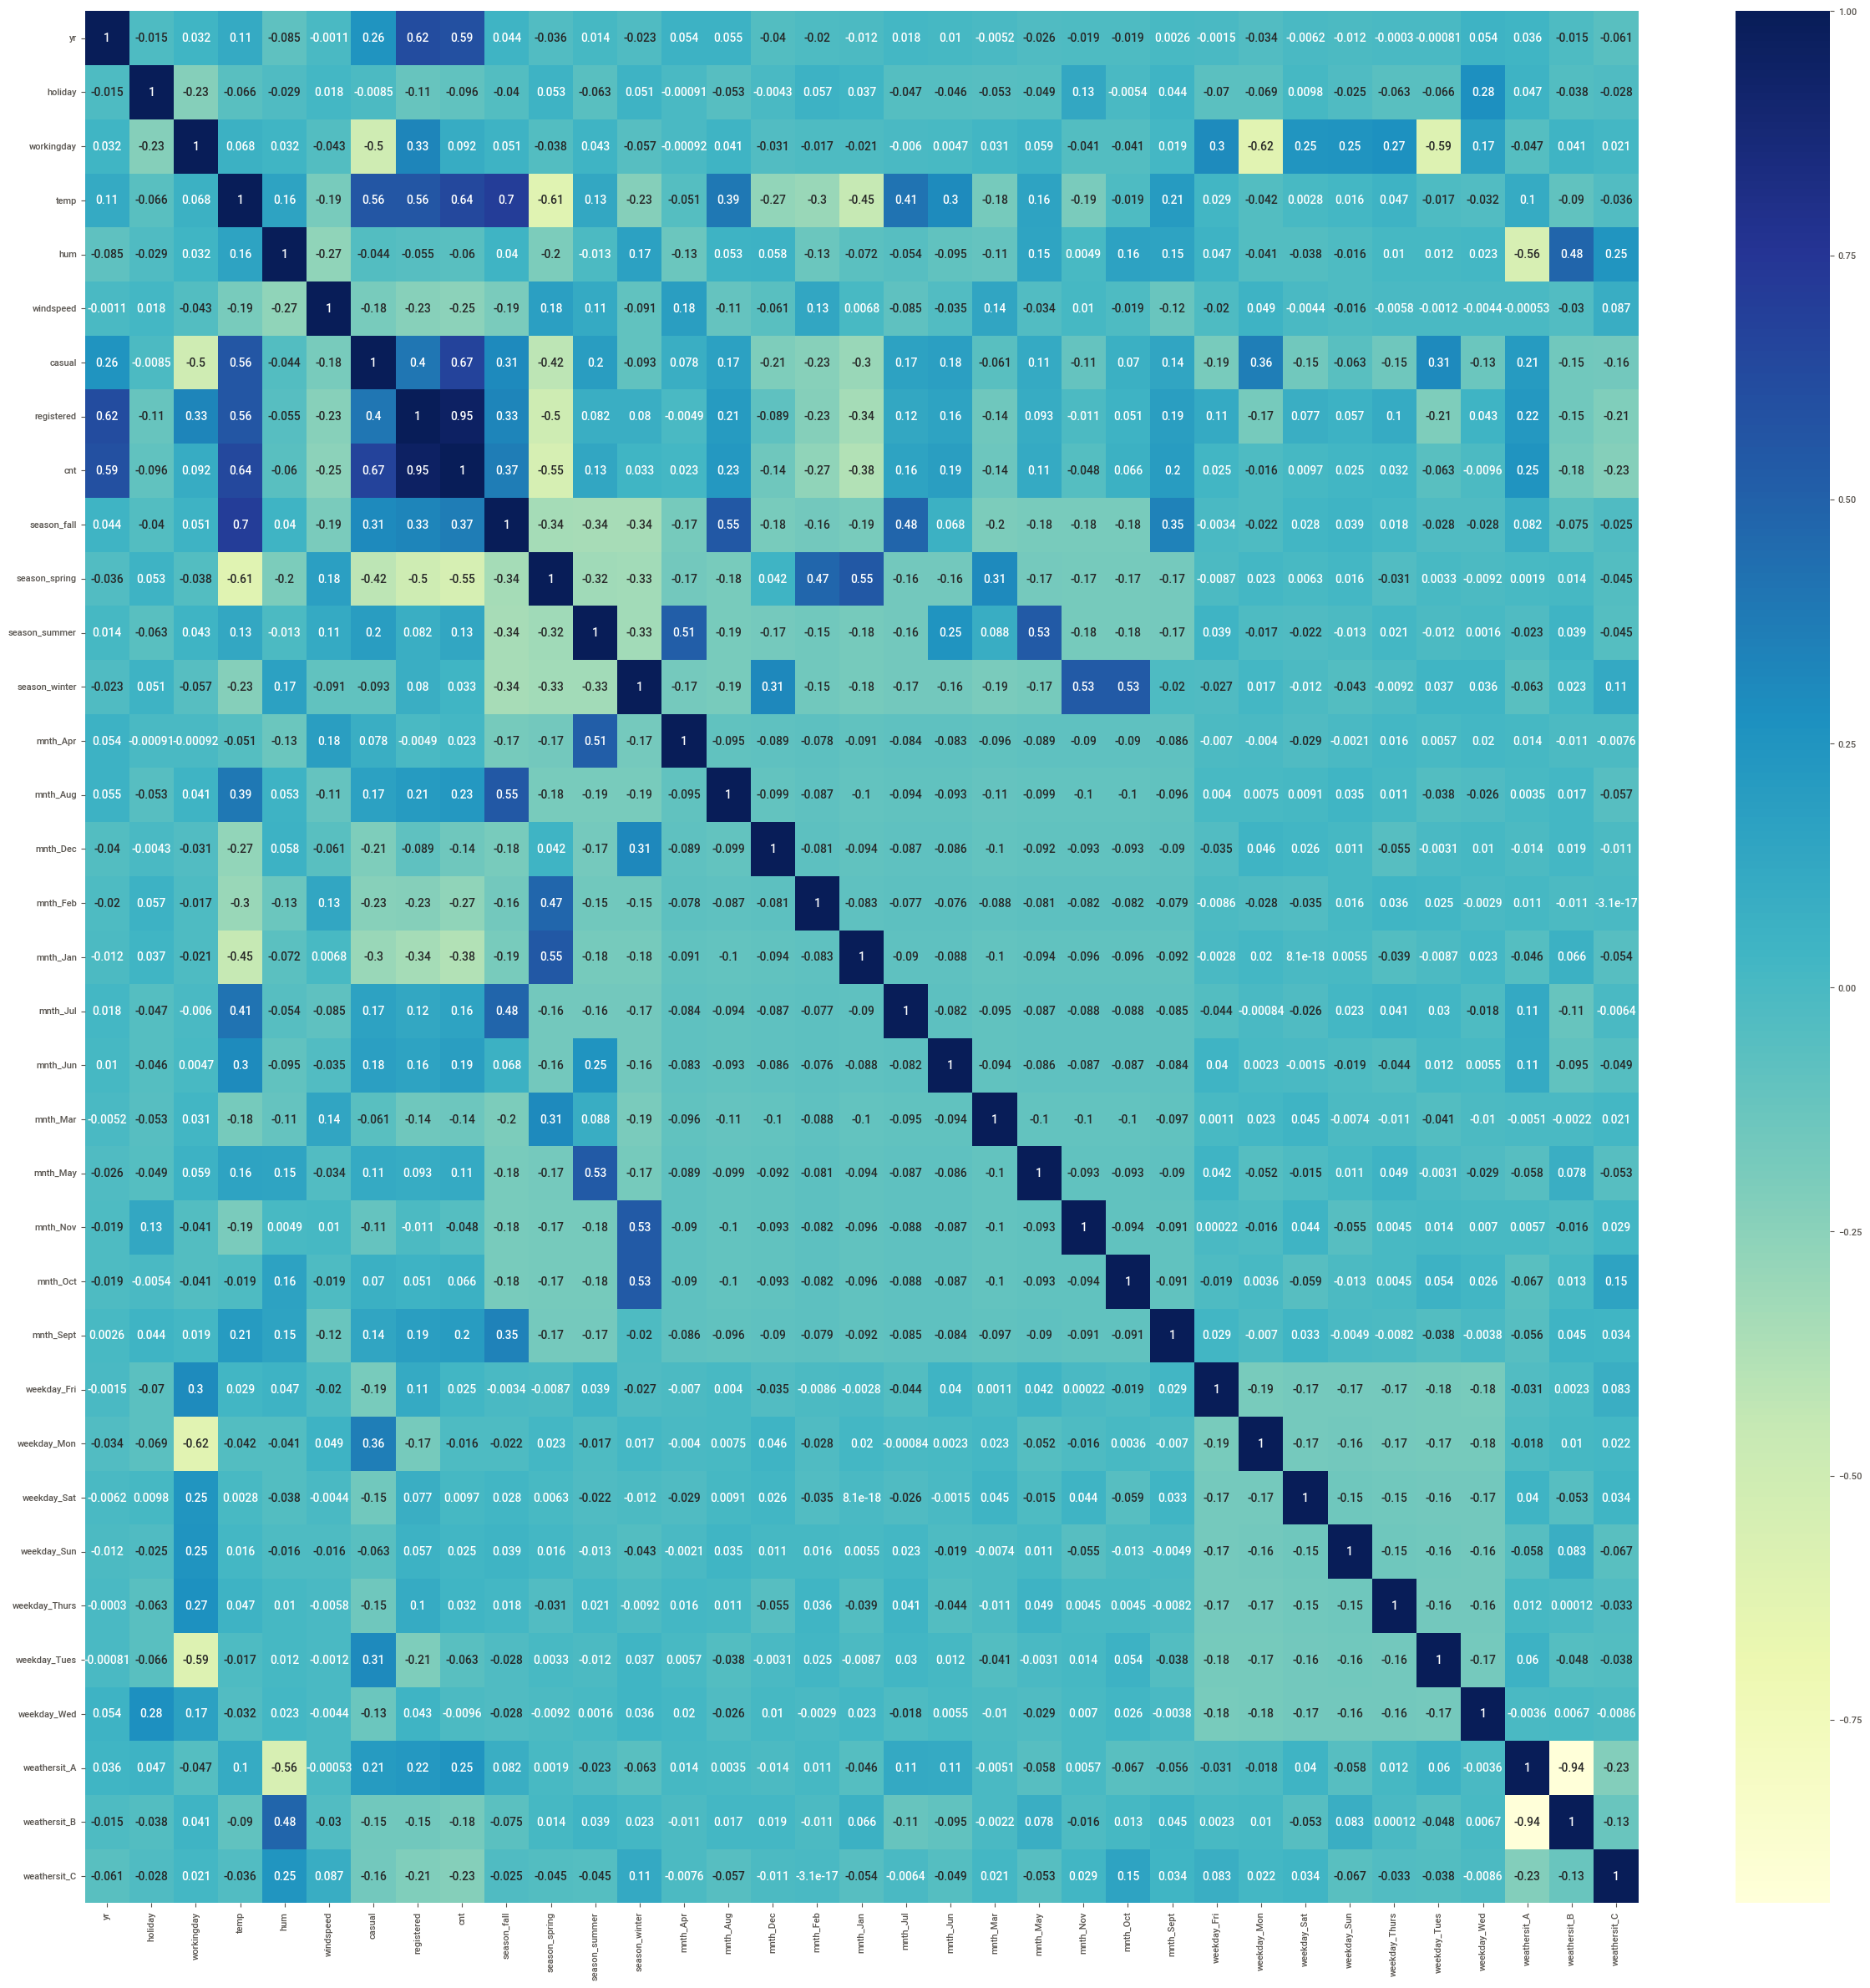

In [227]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


###### we will drop the coloums ["casual","registered"]

In [228]:
df_train=df_train.drop(["casual","registered"],axis=1)

In [229]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   hum            510 non-null    float64
 5   windspeed      510 non-null    float64
 6   cnt            510 non-null    float64
 7   season_fall    510 non-null    uint8  
 8   season_spring  510 non-null    uint8  
 9   season_summer  510 non-null    uint8  
 10  season_winter  510 non-null    uint8  
 11  mnth_Apr       510 non-null    uint8  
 12  mnth_Aug       510 non-null    uint8  
 13  mnth_Dec       510 non-null    uint8  
 14  mnth_Feb       510 non-null    uint8  
 15  mnth_Jan       510 non-null    uint8  
 16  mnth_Jul       510 non-null    uint8  
 17  mnth_Jun       510 non-null    uint8  
 18  mnth_Mar 

###### We see cnt is highly corelated to these coloumns (temp,yr,season_fall,weathersit_A,mnth_Aug,mnth_Sept,mnth_Jun,mnth_Jul,season_summer,mnth_May,workingday )  

In [230]:
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_A,weathersit_B,weathersit_C
yr,1.000000,-0.014980,0.031808,0.107288,-0.084792,-0.001108,0.591508,0.044102,-0.036320,0.013856,...,-0.001452,-0.033817,-6.153420e-03,-0.011876,-0.000296,-0.000812,0.053634,0.036425,-0.015469,-6.076399e-02
holiday,-0.014980,1.000000,-0.233863,-0.066282,-0.029093,0.017569,-0.095961,-0.040017,0.053339,-0.063232,...,-0.070276,-0.069242,9.759407e-03,-0.024505,-0.062897,-0.066102,0.279279,0.047427,-0.038279,-2.815377e-02
workingday,0.031808,-0.233863,1.000000,0.067787,0.031989,-0.043176,0.092320,0.050976,-0.037932,0.043274,...,0.300501,-0.619074,2.465943e-01,0.251739,0.268948,-0.591001,0.174565,-0.047424,0.040766,2.115873e-02
temp,0.107288,-0.066282,0.067787,1.000000,0.155415,-0.187396,0.643517,0.697524,-0.605988,0.125582,...,0.029363,-0.042274,2.826576e-03,0.015943,0.046646,-0.017048,-0.032126,0.101146,-0.090161,-3.609266e-02
hum,-0.084792,-0.029093,0.031989,0.155415,1.000000,-0.266895,-0.059993,0.040371,-0.201134,-0.013216,...,0.047185,-0.040521,-3.822174e-02,-0.016161,0.010123,0.012224,0.022612,-0.557990,0.481042,2.450381e-01
windspeed,-0.001108,0.017569,-0.043176,-0.187396,-0.266895,1.000000,-0.253794,-0.194690,0.180743,0.110089,...,-0.019567,0.049356,-4.353283e-03,-0.015764,-0.005849,-0.001221,-0.004372,-0.000531,-0.030385,8.689990e-02
cnt,0.591508,-0.095961,0.092320,0.643517,-0.059993,-0.253794,1.000000,0.371606,-0.548871,0.134343,...,0.025216,-0.016215,9.709936e-03,0.024581,0.031883,-0.063385,-0.009552,0.251548,-0.175530,-2.265984e-01
season_fall,0.044102,-0.040017,0.050976,0.697524,0.040371,-0.194690,0.371606,1.000000,-0.338357,-0.340160,...,-0.003441,-0.021633,2.795870e-02,0.039030,0.018412,-0.027737,-0.027766,0.082208,-0.074887,-2.481685e-02
season_spring,-0.036320,0.053339,-0.037932,-0.605988,-0.201134,0.180743,-0.548871,-0.338357,1.000000,-0.322955,...,-0.008680,0.022641,6.274901e-03,0.016394,-0.030988,0.003276,-0.009212,0.001854,0.013970,-4.455809e-02
season_summer,0.013856,-0.063232,0.043274,0.125582,-0.013216,0.110089,0.134343,-0.340160,-0.322955,1.000000,...,0.039248,-0.017169,-2.234951e-02,-0.012731,0.021300,-0.011612,0.001623,-0.022924,0.039442,-4.523062e-02


###### Lets drop the rest of the coloumns

In [231]:
df_train = df_train.drop(['mnth_Oct',
'season_winter',
'weekday_Thurs',
'weekday_Fri',
'weekday_Sun',
'mnth_Apr',
'weekday_Sat',
'weekday_Wed',
'weekday_Mon',
'mnth_Nov',
'hum',
'weekday_Tues',
'holiday',
'mnth_Mar',
'mnth_Dec',
'weathersit_B',
'weathersit_C',
'windspeed',
'mnth_Feb',
'mnth_Jan',
'season_spring'],axis=1) 

In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   workingday     510 non-null    int64  
 2   temp           510 non-null    float64
 3   cnt            510 non-null    float64
 4   season_fall    510 non-null    uint8  
 5   season_summer  510 non-null    uint8  
 6   mnth_Aug       510 non-null    uint8  
 7   mnth_Jul       510 non-null    uint8  
 8   mnth_Jun       510 non-null    uint8  
 9   mnth_May       510 non-null    uint8  
 10  mnth_Sept      510 non-null    uint8  
 11  weathersit_A   510 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 23.9 KB


###### we only have now thoese variable which are highly corelated to the cnt (our target variable)

In [233]:
df_train.corr()

,yr,workingday,temp,cnt,season_fall,season_summer,mnth_Aug,mnth_Jul,mnth_Jun,mnth_May,mnth_Sept,weathersit_A
yr,1.000000,0.031808,0.107288,0.591508,0.044102,0.013856,0.054774,0.017623,0.010484,-0.025933,0.002574,0.036425
workingday,0.031808,1.000000,0.067787,0.092320,0.050976,0.043274,0.040575,-0.006030,0.004694,0.059006,0.019495,-0.047424
temp,0.107288,0.067787,1.000000,0.643517,0.697524,0.125582,0.387456,0.413929,0.302997,0.155415,0.207457,0.101146
cnt,0.591508,0.092320,0.643517,1.000000,0.371606,0.134343,0.227229,0.157812,0.187821,0.113027,0.201327,0.251548
season_fall,0.044102,0.050976,0.697524,0.371606,1.000000,-0.340160,0.546121,0.482018,0.068127,-0.181148,0.347811,0.082208
season_summer,0.013856,0.043274,0.125582,0.134343,-0.340160,1.000000,-0.185769,-0.163963,0.254937,0.532539,-0.168473,-0.022924
mnth_Aug,0.054774,0.040575,0.387456,0.227229,0.546121,-0.185769,1.000000,-0.093814,-0.092506,-0.098929,-0.096395,0.003508
mnth_Jul,0.017623,-0.006030,0.413929,0.157812,0.482018,-0.163963,-0.093814,1.000000,-0.081647,-0.087317,-0.085080,0.114904
mnth_Jun,0.010484,0.004694,0.302997,0.187821,0.068127,0.254937,-0.092506,-0.081647,1.000000,-0.086099,-0.083893,0.110530
mnth_May,-0.025933,0.059006,0.155415,0.113027,-0.181148,0.532539,-0.098929,-0.087317,-0.086099,1.000000,-0.089718,-0.058097


###### The 'cnt' is a y variabler with is our target variable 

In [234]:
y_train = df_train.pop('cnt')

In [235]:
y_train.head()

653    7534.0
576    7216.0
426    4066.0
728    1796.0
482    4220.0
Name: cnt, dtype: float64

In [236]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   workingday     510 non-null    int64  
 2   temp           510 non-null    float64
 3   season_fall    510 non-null    uint8  
 4   season_summer  510 non-null    uint8  
 5   mnth_Aug       510 non-null    uint8  
 6   mnth_Jul       510 non-null    uint8  
 7   mnth_Jun       510 non-null    uint8  
 8   mnth_May       510 non-null    uint8  
 9   mnth_Sept      510 non-null    uint8  
 10  weathersit_A   510 non-null    uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 19.9 KB


###### Assiging rest of the coloums to be used for the training 
###### We can use these variable for the training of the model

In [237]:
X_train = df_train
X_train.head()

,yr,workingday,temp,season_fall,season_summer,mnth_Aug,mnth_Jul,mnth_Jun,mnth_May,mnth_Sept,weathersit_A
653,1,1,19.201653,0,0,0,0,0,0,0,1
576,1,1,29.246653,1,0,0,1,0,0,0,1
426,1,0,16.980847,0,0,0,0,0,0,0,0
728,1,0,10.489153,0,0,0,0,0,0,0,1
482,1,0,15.443347,0,1,0,0,0,0,0,0


In [238]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   workingday     510 non-null    int64  
 2   temp           510 non-null    float64
 3   season_fall    510 non-null    uint8  
 4   season_summer  510 non-null    uint8  
 5   mnth_Aug       510 non-null    uint8  
 6   mnth_Jul       510 non-null    uint8  
 7   mnth_Jun       510 non-null    uint8  
 8   mnth_May       510 non-null    uint8  
 9   mnth_Sept      510 non-null    uint8  
 10  weathersit_A   510 non-null    uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 19.9 KB


In [240]:
X_train.shape

(510, 11)

##### Building the model

In [241]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            -573.463084
yr               2017.621701
workingday        181.446977
temp              176.186026
season_fall      -752.311227
season_summer      57.638816
mnth_Aug          244.151289
mnth_Jul         -402.128633
mnth_Jun         -182.444499
mnth_May           13.463312
mnth_Sept         926.532101
weathersit_A      796.085538
dtype: float64

In [242]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     136.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.31e-142
Time:                        22:03:35   Log-Likelihood:                -4232.6
No. Observations:                 510   AIC:                             8489.
Df Residuals:                     498   BIC:                             8540.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -573.4631    193.208     -2.968

In [243]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   hum            219 non-null    float64
 5   windspeed      219 non-null    float64
 6   casual         219 non-null    float64
 7   registered     219 non-null    float64
 8   cnt            219 non-null    float64
 9   season_fall    219 non-null    uint8  
 10  season_spring  219 non-null    uint8  
 11  season_summer  219 non-null    uint8  
 12  season_winter  219 non-null    uint8  
 13  mnth_Apr       219 non-null    uint8  
 14  mnth_Aug       219 non-null    uint8  
 15  mnth_Dec       219 non-null    uint8  
 16  mnth_Feb       219 non-null    uint8  
 17  mnth_Jan       219 non-null    uint8  
 18  mnth_Jul 

In [244]:
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [245]:
df_test = df_test.drop(['mnth_Oct',
'season_winter',
'weekday_Thurs',
'weekday_Fri',
'weekday_Sun',
'mnth_Apr',
'weekday_Sat',
'weekday_Wed',
'weekday_Mon',
'mnth_Nov',
'hum',
'weekday_Tues',
'holiday',
'mnth_Mar',
'mnth_Dec',
'weathersit_B',
'weathersit_C',
'windspeed',
'mnth_Feb',
'mnth_Jan',
'season_spring'],axis=1) 

In [246]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   workingday     219 non-null    int64  
 2   temp           219 non-null    float64
 3   casual         219 non-null    float64
 4   registered     219 non-null    float64
 5   season_fall    219 non-null    uint8  
 6   season_summer  219 non-null    uint8  
 7   mnth_Aug       219 non-null    uint8  
 8   mnth_Jul       219 non-null    uint8  
 9   mnth_Jun       219 non-null    uint8  
 10  mnth_May       219 non-null    uint8  
 11  mnth_Sept      219 non-null    uint8  
 12  weathersit_A   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 12.0 KB


In [247]:
X_test=df_test

In [248]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   workingday     219 non-null    int64  
 2   temp           219 non-null    float64
 3   casual         219 non-null    float64
 4   registered     219 non-null    float64
 5   season_fall    219 non-null    uint8  
 6   season_summer  219 non-null    uint8  
 7   mnth_Aug       219 non-null    uint8  
 8   mnth_Jul       219 non-null    uint8  
 9   mnth_Jun       219 non-null    uint8  
 10  mnth_May       219 non-null    uint8  
 11  mnth_Sept      219 non-null    uint8  
 12  weathersit_A   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 12.0 KB


In [249]:
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   casual         219 non-null    float64
 5   registered     219 non-null    float64
 6   season_fall    219 non-null    uint8  
 7   season_summer  219 non-null    uint8  
 8   mnth_Aug       219 non-null    uint8  
 9   mnth_Jul       219 non-null    uint8  
 10  mnth_Jun       219 non-null    uint8  
 11  mnth_May       219 non-null    uint8  
 12  mnth_Sept      219 non-null    uint8  
 13  weathersit_A   219 non-null    uint8  
dtypes: float64(4), int64(2), uint8(8)
memory usage: 13.7 KB


In [251]:
X_test_lm=X_test_lm.drop(["casual","registered"],axis=1)

In [252]:
# Making predictions
y_pred = lr.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

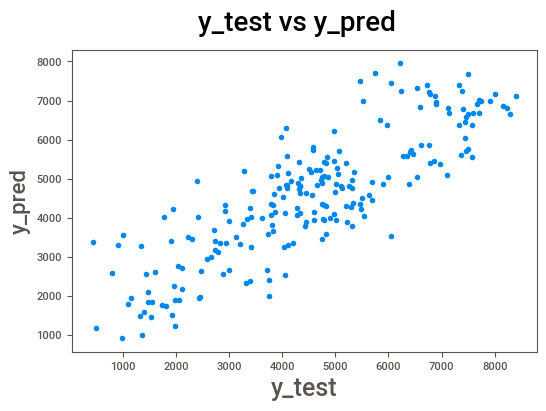

In [253]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [254]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7118191002888759

##### Thus, for the model with 12 variables, the r-squared on training and test data is about 75.1% and 71.1% respectively. The adjusted r-squared on the train set is about is about 74.6%.

In [256]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   workingday     510 non-null    int64  
 2   temp           510 non-null    float64
 3   season_fall    510 non-null    uint8  
 4   season_summer  510 non-null    uint8  
 5   mnth_Aug       510 non-null    uint8  
 6   mnth_Jul       510 non-null    uint8  
 7   mnth_Jun       510 non-null    uint8  
 8   mnth_May       510 non-null    uint8  
 9   mnth_Sept      510 non-null    uint8  
 10  weathersit_A   510 non-null    uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 19.9 KB


#### Residual analysis 
###### The gragh shows it is normally distributed which means the model is good foe future predictions

In [257]:
y_train_pred = lr.predict(X_train_lm)
res = (y_train - y_train_pred)

<Figure size 600x400 with 0 Axes>

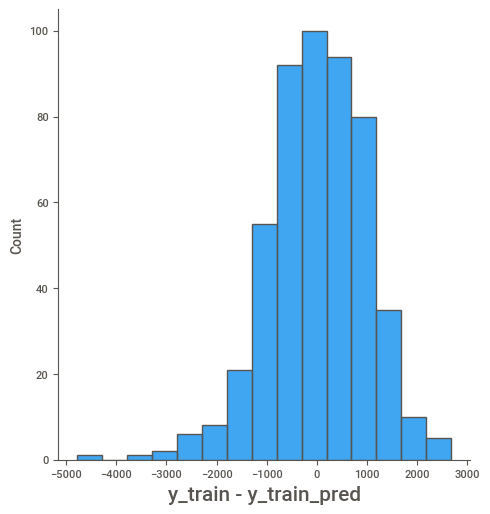

In [259]:
fig = plt.figure()
sns.displot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()